# import library :


In [ ]:
!pip install emoji


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 5.9 MB/s eta 0:00:00


In [ ]:
!pip uninstall gensim -y
!pip uninstall numpy -y
!pip install numpy==1.26.6  # Install a compatible numpy version first
!pip install --upgrade gensim # Then upgrade gensim
import os
os.kill(os.getpid(), 9)

# Restart the kernel after running this cell if prompted.

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement numpy==1.26.6 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20.1, 1.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from plotly.offline import iplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import emoji
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
from nltk.corpus  import stopwords
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import spacy
nlp=spacy.load('en_core_web_sm')
import string # remove punkuation in data text
from gensim.models import Word2Vec
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
data=pd.read_csv('/content/Emotional-Tone-Dataset.csv')
data.columns=data.columns.str.strip()# remove space in data
data['TWEET']=data['TWEET'].astype(str) # convert the features tweet to string

In [ ]:
# explore data :
class Explor_Data:
    def __init__(self, data):
        if not isinstance(data, pd.DataFrame):
            raise ValueError('Input data must be a pandas DataFrame.')
        self.data = data

    def display_head_data(self):
      return self.data.head(5)

    def display_sample_data(self):
      return self.data.sample(5)
    def info_data(self):
        return self.data.info()

    def describe_data(self):
        return self.data.describe(include='O')  # الوصف للـ object/string columns

    def missing_values(self):
        missing_counts = self.data.isna().sum()
        total_missing = missing_counts.sum()
        return f"Total missing values: {total_missing}".title()

    def shape_data(self):
        print(f"Number of rows: {self.data.shape[0]}")
        print(f"Number of features: {self.data.shape[1]}")

    def count_label(self):
        if 'LABEL' not in self.data.columns:
            raise KeyError("DataFrame has no 'LABEL' column.")

        value_counts_label = self.data['LABEL'].value_counts()
        total = len(self.data)

        fig = px.bar(
            x=value_counts_label.index.astype(str),
            y=value_counts_label.values,
            color=value_counts_label.index.astype(str),
            title='Count of Label in Data',
            labels={'x': 'Label', 'y': 'Count'},
            text=[f"{(count/total)*100:.2f}%" for count in value_counts_label.values],
            template='plotly_dark'
        )

        fig.update_traces(
            textposition="outside",
            textfont={"size": 12, "family": "Consolas"}
        )

        fig.update_layout(
            xaxis=dict(
                tickmode='linear',
                dtick=1
            )
        )

        fig.show()


In [ ]:
explore_data=Explor_Data(data)
explore_data.display_head_data() #display head data:


,ID,TWEET,LABEL
0,1,الاوليمبياد الجايه هكون لسه ف الكليه ..,none
1,2,عجز الموازنه وصل ل93.7 % من الناتج المحلي يعني...,anger
2,3,كتنا نيله ف حظنا الهباب xD,sadness
3,4,جميعنا نريد تحقيق اهدافنا لكن تونس تالقت في حر...,joy
4,5,الاوليمبياد نظامها مختلف .. ومواعيد المونديال ...,none


In [ ]:
explore_data.display_sample_data() #display sample data:


,ID,TWEET,LABEL
1394,1395,📍الحزن !! ماهو الا تلك الدموع التي تتراڪم امام...,sadness
9943,9944,3 في 2001 و6 في اللي قبليهم مرتين وفي الاوليمب...,none
4301,4302,: Nasralla قلوبنا معكم وندعوا الله يحفضكم ...,sympathy
3399,3400,مذيع النايل سبورت: احنا بقالنا كتير ما اخذناش ...,anger
199,200,Rio2016 المصريون في الاوليمبياد وثقافه الاستس...,sadness


In [ ]:
explore_data.info_data()# info data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10065 entries, 0 to 10064
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      10065 non-null  int64 
 1   TWEET   10065 non-null  object
 2   LABEL   10065 non-null  object
dtypes: int64(1), object(2)
memory usage: 236.0+ KB


In [ ]:
explore_data.describe_data() # describe data object

,TWEET,LABEL
count,10065,10065
unique,10021,8
top,الاوليمبياد,none
freq,4,1550


In [ ]:
explore_data.missing_values() # missing values in data

'Total Missing Values: 0'

In [ ]:
explore_data.shape_data() # the shape data

Number of rows: 10065
Number of features: 3


In [ ]:
 explore_data.count_label() # visulization the label data

# Explore In Text Data

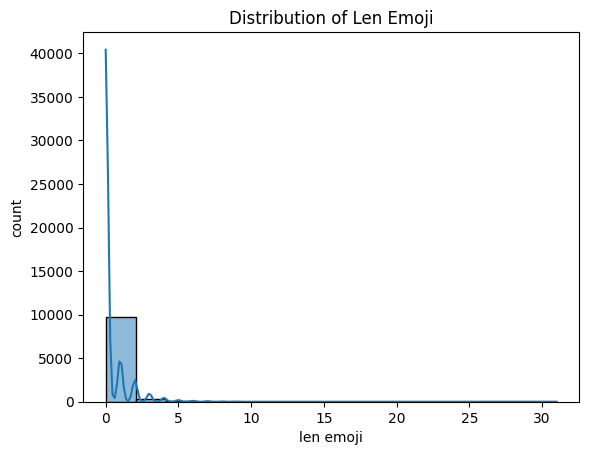

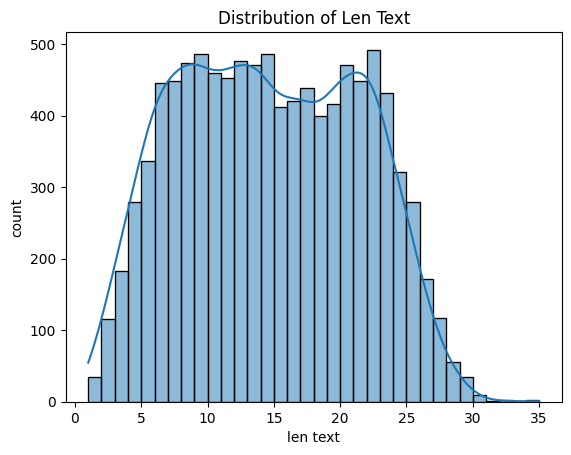

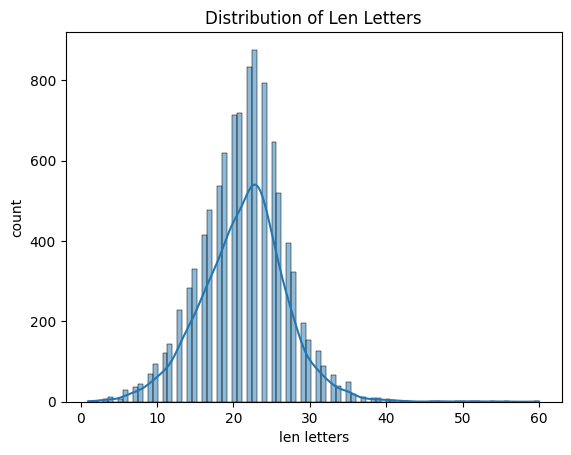

In [ ]:
class Explor_TEXT:
    def __init__(self, data):
        if not isinstance(data, pd.DataFrame):
            raise ValueError('Input data must be a pandas DataFrame.')
        self.data = data

    def Feature_eng(self):
        self.data['len emoji'] = self.data['TWEET'].apply(
            lambda row: len([emo for emo in str(row) if emo in emoji.EMOJI_DATA])
        )  # len of emoji

        self.data['len text'] = self.data['TWEET'].apply(
            lambda row: len(str(row).split())
        )  # len of text

        self.data['len letters'] = self.data['TWEET'].apply(
            lambda row: len(set(str(row)))
        )  # len of unique letters

    def visualization(self):
        for col in ['len emoji', 'len text', 'len letters']:
          sns.histplot(self.data,x=col,kde=True)
          plt.title(f'Distribution of {col.replace("_", " ").title()}')
          plt.xlabel(col)
          plt.ylabel('count')
          plt.show()



if __name__=='__main__':
  explorer = Explor_TEXT(data)
  explorer.Feature_eng()
  explorer.visualization()

In [ ]:
class TextVisualizer:
    def __init__(self, data):
        if not isinstance(data, pd.DataFrame):
            raise ValueError('Input data must be a pandas DataFrame.')
        if 'TWEET' not in data.columns:
            raise ValueError("DataFrame must have a 'TWEET' column.")

        self.data=data

    def ferquenc(self,text_col='TWEET',label_col=None,label_value=None,top_n=15):
        if label_col is not None and label_value is not None:
          text=self.data[self.data[label_col]==label_value][text_col].astype(str)
          title = f"Top {top_n} Words in Label '{label_value}'"

        else:
          text=self.data[text_col].astype(str)
          title = f"Top {top_n} Words in All Data"

        words=' '.join(text)
        words = re.sub(r'http\S+|@\S+|[^A-Za-z\u0600-\u06FF ]+', '', words)

        word_list = words.split()

        arabic_stopwords  = set(stopwords.words('arabic'))

        word_list = [w for w in word_list if w not in arabic_stopwords  and len(w) > 1]

        freq = pd.Series(word_list).value_counts().head(top_n)

        fig = px.bar(freq, x=freq.index, y=freq.values,color=freq.index.astype(str), title=title, labels={'x':'Word', 'y':'Frequency'}, template='plotly_dark')
        fig.show()


if __name__=='__main__':
  textvisuliz=TextVisualizer(data)
  textvisuliz.ferquenc()

# preprocesssing


In [ ]:
import pandas as pd
import string
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Arabic diacritics to be removed
arabic_diacritics = [
    '\u0610', '\u0611', '\u0612', '\u0613', '\u0614', '\u0615', '\u0616',
    '\u0617', '\u0618', '\u0619', '\u061A',
    '\u064B', '\u064C', '\u064D', '\u064E', '\u064F', '\u0650', '\u0651',
    '\u0652', '\u0653', '\u0654', '\u0655'
]


class Preprocessing:

    def __init__(self, data):
        if not isinstance(data, pd.DataFrame):
            raise ValueError('Input data must be a pandas DataFrame.')
        self.data = data

    def remove_punkuation(self):
        self.data['TWEET_clean'] = self.data['TWEET'].astype(str).apply(
            lambda x: x.translate(str.maketrans('', '', string.punctuation))
        )

    def remove_tages(self):
        def remove_html_tags(text):
            return BeautifulSoup(text, "html.parser").get_text()
        self.data['TWEET_clean'] = self.data['TWEET_clean'].apply(remove_html_tags)

    def remove_diacritics(self):
        def remove_arabic_diacritics(text):
            for diacritic in arabic_diacritics:
                text = text.replace(diacritic, '')
            return text
        self.data['TWEET_clean'] = self.data['TWEET_clean'].apply(remove_arabic_diacritics)

    def replace_emojis(self):
        def replace_emoji(text):
              text = emoji.demojize(text, delimiters=(" :", ": "))
              return text
        self.data['TWEET_clean'] = self.data['TWEET_clean'].apply(replace_emoji)

    def remove_digit(self):
        def remove_data_digit(text):
            return re.sub(r'\d+', '', text)  # removes entire numeric sequences
        self.data['TWEET_clean'] = self.data['TWEET_clean'].apply(remove_data_digit)

    def remove_stop_words(self):
        def remove_stopwords(text):
            text = re.sub(r'\s+', ' ', text, flags=re.MULTILINE)
            stop_words = set(stopwords.words('arabic'))
            lemmatizer = WordNetLemmatizer()
            tokens = word_tokenize(text)
            filtered_words = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
            return ' '.join(filtered_words)
        self.data['TWEET_clean'] = self.data['TWEET_clean'].apply(remove_stopwords)

    def return_preprocessing(self):
        return self.data


if __name__ == '__main__':
    # Make sure `data` is a pandas DataFrame with a 'TWEET' column
    pre = Preprocessing(data)

    pre.remove_punkuation()
    pre.remove_tages()
    pre.remove_diacritics()
    pre.replace_emojis()
    pre.remove_digit()
    pre.remove_stop_words()

    preprocessing_data = pre.return_preprocessing()


In [ ]:
import numpy
import gensim

print("Numpy version:", numpy.__version__)
print("Gensim version:", gensim.__version__)


Numpy version: 1.26.4
Gensim version: 4.3.3


### New sectionText Representation Techniques

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd
import gensim.downloader as api

# Label encoding
le = LabelEncoder()
data['LABEL'] = le.fit_transform(data['LABEL'])

# Load fastText model from gensim
fasttext_model = api.load("fasttext-wiki-news-subwords-300")

class TextRepresentation:
    def __init__(self, data):
        self.data = data
        self.bag = None
        self.tfidf = None

    def bow(self):
        vectorizer = CountVectorizer()
        self.bag = vectorizer.fit_transform(self.data['TWEET_clean'])
        return pd.DataFrame(self.bag.toarray(), columns=vectorizer.get_feature_names_out())

    def tf_idf(self):
        vectorizer = TfidfVectorizer()
        self.tfidf = vectorizer.fit_transform(self.data['TWEET_clean'])
        return pd.DataFrame(self.tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Initialize class and generate bag/tfidf if needed
rep = TextRepresentation(data)

# Embedding function using fastText
def embed_fasttext(text):
    words = [fasttext_model[word] for word in word_tokenize(text) if word in fasttext_model]
    return np.mean(words, axis=0) if words else np.zeros(fasttext_model.vector_size)

# Apply embedding to dataset
embeddings_fasttext = np.array([embed_fasttext(text) for text in data['TWEET_clean']])
X_fasttext = pd.DataFrame(embeddings_fasttext)



In [ ]:
def evaluate_models(X, y, representation_name):
    X = X.values if hasattr(X, 'values') else X

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    models = {
        'SVM': SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced'),
        "Random Forest": RandomForestClassifier(n_estimators=230, class_weight='balanced', max_depth=25),
        'Naive Bayes (GaussianNB)': GaussianNB(),
        'Decision Tree': DecisionTreeClassifier(class_weight='balanced', max_depth=15),
        "AdaBoost": AdaBoostClassifier(n_estimators=100, learning_rate=0.5)
    }

    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        report = classification_report(y_test, y_pred, output_dict=True)
        accuracy = accuracy_score(y_test, y_pred)

        f1_macro = report['macro avg']['f1-score']

        results.append({
            'Representation': representation_name,
            'Model': name,
            'Accuracy': accuracy,
            'F1_macro': f1_macro,
            'Precision_macro': report['macro avg']['precision'],
            'Recall_macro': report['macro avg']['recall']
        })

    return pd.DataFrame(results)


In [ ]:
rep = TextRepresentation(data)

X_bow = rep.bow()
X_tfidf = rep.tf_idf()
X_w2v = X_fasttext



In [ ]:
results_bow = evaluate_models(X_bow, data['LABEL'], 'BoW')
results_tfidf = evaluate_models(X_tfidf, data['LABEL'], 'TF-IDF')
results_w2v = evaluate_models(X_w2v, data['LABEL'], 'Word2Vec')

all_results = pd.concat([results_bow, results_tfidf, results_w2v], ignore_index=True)

print(all_results)

   Representation                     Model  Accuracy  F1_macro  \
0             BoW                       SVM  0.610648  0.594776   
1             BoW             Random Forest  0.606675  0.567376   
2             BoW  Naive Bayes (GaussianNB)  0.461263  0.454266   
3             BoW             Decision Tree  0.483909  0.426172   
4             BoW                  AdaBoost  0.405642  0.318990   
5          TF-IDF                       SVM  0.629321  0.621219   
6          TF-IDF             Random Forest  0.597537  0.560869   
7          TF-IDF  Naive Bayes (GaussianNB)  0.434247  0.430079   
8          TF-IDF             Decision Tree  0.482320  0.420891   
9          TF-IDF                  AdaBoost  0.404847  0.318255   
10       Word2Vec                       SVM  0.331744  0.331805   
11       Word2Vec             Random Forest  0.351609  0.349036   
12       Word2Vec  Naive Bayes (GaussianNB)  0.205403  0.168027   
13       Word2Vec             Decision Tree  0.260628  0.26077

In [ ]:
all_results

,Representation,Model,Accuracy,F1_macro,Precision_macro,Recall_macro
0,BoW,SVM,0.610648,0.594776,0.635121,0.597375
1,BoW,Random Forest,0.606675,0.567376,0.609987,0.600547
2,BoW,Naive Bayes (GaussianNB),0.461263,0.454266,0.455609,0.461736
3,BoW,Decision Tree,0.483909,0.426172,0.610826,0.463826
4,BoW,AdaBoost,0.405642,0.318990,0.453606,0.370342
5,TF-IDF,SVM,0.629321,0.621219,0.677566,0.616014
6,TF-IDF,Random Forest,0.597537,0.560869,0.605313,0.590816
7,TF-IDF,Naive Bayes (GaussianNB),0.434247,0.430079,0.430102,0.433162
8,TF-IDF,Decision Tree,0.482320,0.420891,0.583468,0.458986
9,TF-IDF,AdaBoost,0.404847,0.318255,0.451848,0.369548


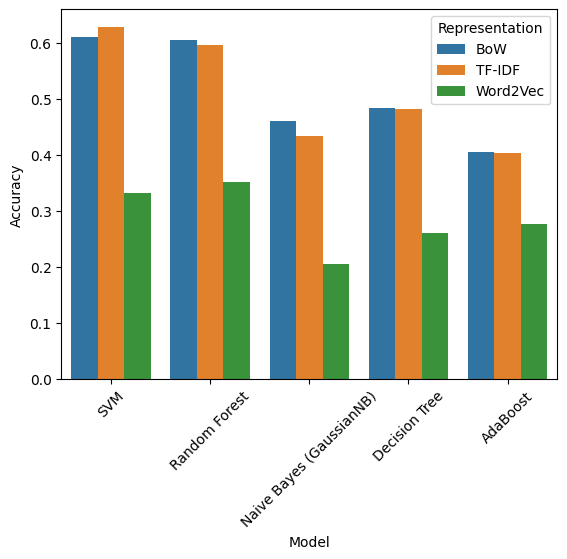

In [ ]:
#visulization of result
sns.barplot(all_results,x='Model',y='Accuracy',hue='Representation')
plt.xticks(rotation=45)
plt.show()

### Part 4. Feed-Forward Neural Network (FNN)
* **Useing:**
    - TF-IDF and averaged Word2Vec vectors as input
    - Architecture: Dense layers with ReLU + Softmax

Epoch 1/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.1384 - loss: 16.9612 - val_accuracy: 0.1273 - val_loss: 15.8989 - learning_rate: 1.0000e-04
Epoch 2/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.1950 - loss: 15.7593 - val_accuracy: 0.1490 - val_loss: 14.9070 - learning_rate: 1.0000e-04
Epoch 3/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.2301 - loss: 14.7047 - val_accuracy: 0.1726 - val_loss: 13.9534 - learning_rate: 1.0000e-04
Epoch 4/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.2481 - loss: 13.7248 - val_accuracy: 0.2191 - val_loss: 13.0324 - learning_rate: 1.0000e-04
Epoch 5/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.2582 - loss: 12.8250 - val_accuracy: 0.2433 - val_loss: 12.1657 - learning_rate: 1.0000e-04
Epoch 6/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.2733 - loss: 11.9888 - val_accuracy: 0.2843 - val_loss: 11.3417 - learning_rate: 1.0000e-04
Epoch 7/100
101/101 ━━━━━━━━━━━━━━━━━━━━

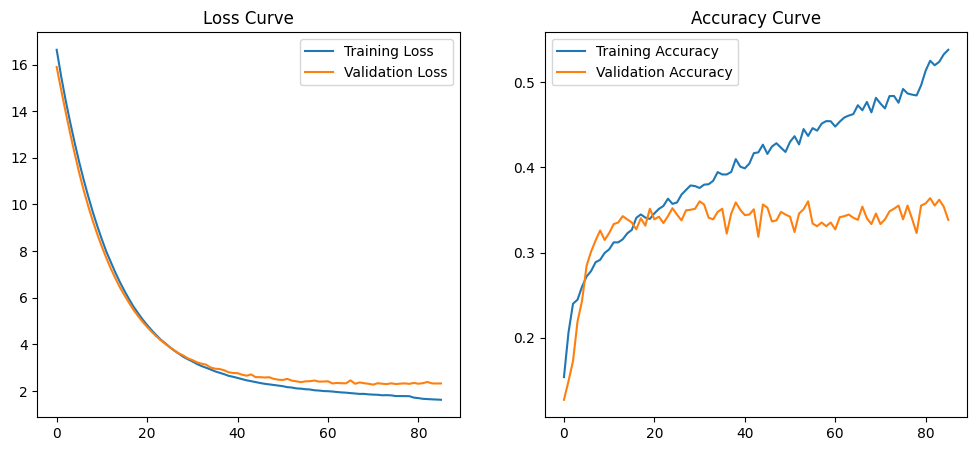

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

X_train, X_test, y_train, y_test = train_test_split(
    X_w2v, data['LABEL'], test_size=0.2, random_state=42, stratify=data['LABEL'])

encoder = LabelEncoder()
y_train_enc = to_categorical(encoder.fit_transform(y_train))
y_test_enc = to_categorical(encoder.transform(y_test))

model = Sequential()
model.add(Input(shape=(X_w2v.shape[1],)))

model.add(Dense(1024, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(512, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(256, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(y_train_enc.shape[1], activation='softmax'))

optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=8, verbose=1, min_lr=1e-7)

history = model.fit(
    X_train, y_train_enc,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

test_loss, test_acc = model.evaluate(X_test, y_test_enc, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curve')

plt.show()

Epoch 1/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 65s 315ms/step - accuracy: 0.1283 - loss: 2.2482 - val_accuracy: 0.1633 - val_loss: 2.0658
Epoch 2/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 65s 323ms/step - accuracy: 0.1600 - loss: 2.0798 - val_accuracy: 0.1614 - val_loss: 2.0577
Epoch 3/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 82s 323ms/step - accuracy: 0.1629 - loss: 2.0635 - val_accuracy: 0.1837 - val_loss: 2.0416
Epoch 4/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 80s 315ms/step - accuracy: 0.1921 - loss: 2.0323 - val_accuracy: 0.2185 - val_loss: 1.9814
Epoch 5/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 83s 321ms/step - accuracy: 0.2320 - loss: 1.9655 - val_accuracy: 0.3681 - val_loss: 1.8657
Epoch 6/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 65s 321ms/step - accuracy: 0.2999 - loss: 1.8547 - val_accuracy: 0.4624 - val_loss: 1.6949
Epoch 7/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 81s 317ms/step - accuracy: 0.3680 - loss: 1.7133 - val_accuracy: 0.4910 - val_loss: 1.5572
Epoch 8/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 64s 316ms/step - accuracy: 0.4456 - loss: 1

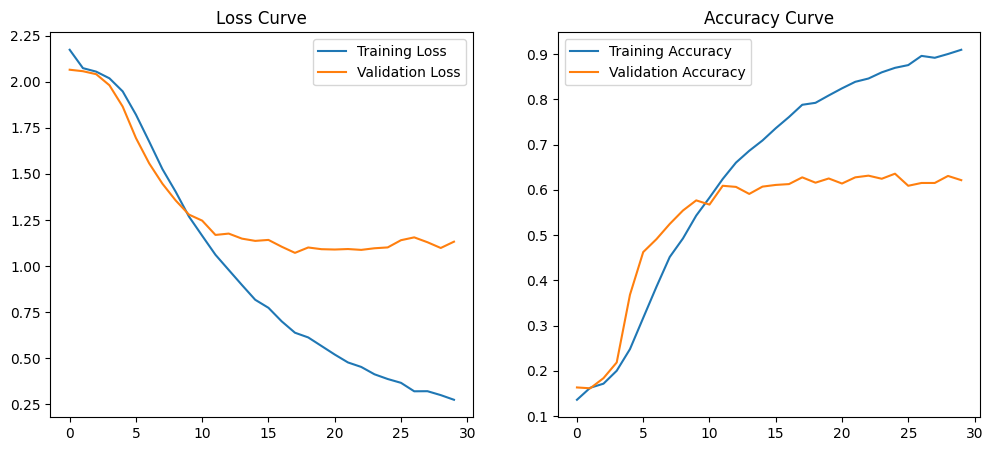

In [ ]:
import numpy as np
from gensim.models import KeyedVectors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

X_combined = np.hstack([X_tfidf, X_w2v])

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(data['LABEL'])
y_cat = to_categorical(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y_cat, test_size=0.2, stratify=y_cat, random_state=42)

model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(X_combined.shape[1],)))
model.add(Dropout(0.7))
model.add(Dense(256, activation='sigmoid'))
model.add(Dropout(0.4))
model.add(Dense(y_cat.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curve')

plt.show()


#  Recurrent Neural Network (LSTM)


evaluation

Epoch 1/40
101/101 ━━━━━━━━━━━━━━━━━━━━ 362s 3s/step - accuracy: 0.1734 - loss: 2.3805 - val_accuracy: 0.4333 - val_loss: 1.6773 - learning_rate: 0.0010
Epoch 2/40
101/101 ━━━━━━━━━━━━━━━━━━━━ 355s 3s/step - accuracy: 0.3715 - loss: 1.7164 - val_accuracy: 0.5009 - val_loss: 1.4197 - learning_rate: 0.0010
Epoch 3/40
101/101 ━━━━━━━━━━━━━━━━━━━━ 337s 3s/step - accuracy: 0.5066 - loss: 1.3731 - val_accuracy: 0.5338 - val_loss: 1.3335 - learning_rate: 0.0010
Epoch 4/40
101/101 ━━━━━━━━━━━━━━━━━━━━ 362s 3s/step - accuracy: 0.5683 - loss: 1.2048 - val_accuracy: 0.5574 - val_loss: 1.3339 - learning_rate: 0.0010
Epoch 5/40
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6609 - loss: 0.9748
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
101/101 ━━━━━━━━━━━━━━━━━━━━ 319s 3s/step - accuracy: 0.6610 - loss: 0.9747 - val_accuracy: 0.5419 - val_loss: 1.6117 - learning_rate: 0.0010
Epoch 6/40
101/101 ━━━━━━━━━━━━━━━━━━━━ 349s 3s/step - accuracy: 0.7404 - loss: 0.766

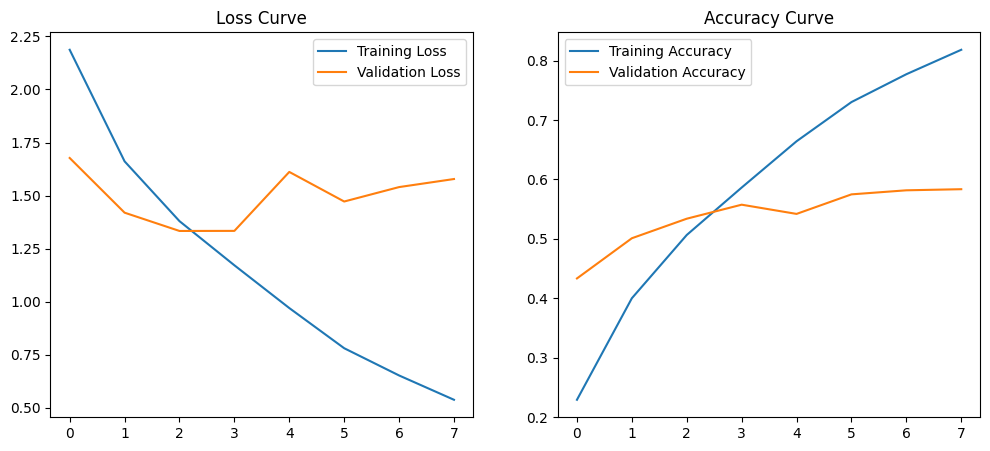

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
from gensim.models import KeyedVectors

# ----------- 1. إعداد المعلمات ------------
MAX_NUM_WORDS = 10000       # عدد الكلمات المستخدمة
MAX_SEQUENCE_LENGTH = 150   # طول التسلسل (padding/truncating)
EMBEDDING_DIM = 300         # أبعاد Word2Vec (مثلاً 300 لـ cc.ar.300.vec)

# ----------- 2. Tokenize النصوص وPad ------------
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(data['TWEET_clean'])
sequences = tokenizer.texts_to_sequences(data['TWEET_clean'])
X_seq = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

# ----------- 3. ترميز التصنيفات One-hot ------------
encoder = LabelEncoder()
y = encoder.fit_transform(data['LABEL'])
y_cat = to_categorical(y)

# ----------- 4. تحميل نموذج Word2Vec مسبق التدريب ------------
w2v_model = X_w2v  # تأكد من أن X_w2v هو النموذج المحمّل

# ----------- 5. بناء مصفوفة الأوزان Embedding Matrix ------------
word_index = tokenizer.word_index
num_words = min(MAX_NUM_WORDS, len(word_index) + 1)

embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    if word in w2v_model:
        embedding_matrix[i] = w2v_model[word]
    else:
        # يمكن اختيار قيم عشوائية بدل الصفر
        embedding_matrix[i] = np.random.normal(size=(EMBEDDING_DIM,))

# ----------- 6. تقسيم البيانات ------------
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_cat, test_size=0.2, stratify=y, random_state=42)

# ----------- 7. بناء نموذج BiLSTM مع تحسينات ------------
model = Sequential()

# طبقة Embedding مع Fine-tuning
model.add(Embedding(input_dim=num_words,
                    output_dim=EMBEDDING_DIM,
                    weights=[embedding_matrix],
                    input_length=MAX_SEQUENCE_LENGTH,
                    trainable=True))  # fine-tuning

# طبقة LSTM مع BatchNormalization
model.add(Bidirectional(LSTM(256, return_sequences=True)))  # زيادة الـ units و return_sequences=True
model.add(Dropout(0.5))
model.add(BatchNormalization())  # لتحسين استقرار التدريب

# طبقة LSTM أخرى أو BiLSTM
model.add(Bidirectional(LSTM(128, return_sequences=False)))  # طبقة ثانية لـ BiLSTM
model.add(Dropout(0.3))
model.add(BatchNormalization())  # لتقوية الاستقرار

# طبقة Dense
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))

# طبقة الإخراج
model.add(Dense(y_cat.shape[1], activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# ----------- 8. Callbacks للتدريب ------------
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

# ----------- 9. تدريب النموذج ------------
history = model.fit(X_train, y_train,
                    epochs=40,  # زيادة عدد الـ epochs
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stop, reduce_lr])

# ----------- 10. تقييم النموذج ------------
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curve')

plt.show()

# transformars

In [ ]:
!pip install transformers datasets arabert nltk -q
!pip install --upgrade accelerate -q

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from datasets import Dataset
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import nltk
nltk.download('punkt')

# Load the tokenizer and model after imports
model_name = "aubmindlab/bert-base-arabertv2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(labels))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# استبدل هذا برفع ملفك الحقيقي أو تحميله من Drive
data = pd.read_csv("/content/Emotional-Tone-Dataset.csv")  # لازم يكون فيه 'TWEET' و 'LABEL'
print(data.columns)


Index(['ID', ' TWEET', ' LABEL'], dtype='object')


In [ ]:
data = data[data[' LABEL'].notna()]


In [ ]:
data = data.reset_index(drop=True)

# تحويل الليبلات لأرقام
labels = data[' LABEL'].unique().tolist()
label2id = {label: idx for idx, label in enumerate(labels)}
id2label = {idx: label for label, idx in label2id.items()}

data[' label'] = data[' LABEL'].map(label2id)

In [ ]:
model_name = "aubmindlab/bert-base-arabertv2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(labels))


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from datasets import Dataset
import pandas as pd # Ensure pandas is imported if not already in this block

# Ensure ' TWEET' column is string type and handle potential NaNs
data[' TWEET'] = data[' TWEET'].astype(str).fillna('')

# Ensure ' label' column is integer type and handle potential NaNs by filling with a placeholder or removing rows
# Assuming 'label' should correspond to your numerical labels, fillna(0) might be appropriate, or dropna()
data[' label'] = data[' label'].fillna(-1).astype(int) # Fill NaN with -1 or some indicator

# Filter out rows where 'label' was NaN and filled with -1, if necessary
data = data[data[' label'] != -1]

# Create the dataset directly from lists - using the ' label' column (with space)
hf_dataset = Dataset.from_dict({
    " TWEET": data[" TWEET"].tolist(),
    " label": data[" label"].tolist() # Use the ' label' column with space
})

hf_dataset = hf_dataset.train_test_split(test_size=0.2)

def tokenize_function(example):
    # Pass the text explicitly as the 'text' argument
    return tokenizer(text=example[" TWEET"], truncation=True, padding="max_length", max_length=128)


hf_dataset = hf_dataset.map(tokenize_function, batched=False) # Keep batched as False

# Rename the ' label' column to 'labels' within the dataset object
hf_dataset = hf_dataset.rename_column(" label", "labels")

hf_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels']) # Use "labels" without space

print(hf_dataset)

Map:   0%|          | 0/8052 [00:00<?, ? examples/s]

Map:   0%|          | 0/2013 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: [' TWEET', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 8052
    })
    test: Dataset({
        features: [' TWEET', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2013
    })
})


In [ ]:
from transformers import TrainingArguments, Trainer # Import TrainingArguments and Trainer
import numpy as np # Ensure numpy is imported if not already in this block
from sklearn.metrics import accuracy_score # Ensure accuracy_score is imported

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch", # Changed save_strategy to match eval_strategy
    save_total_limit=2,
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=4,
    weight_decay=0.01,
    logging_dir='./logs',
    load_best_model_at_end=True,
    metric_for_best_model='accuracy'
)

def compute_metrics(eval_pred):
    # from sklearn.metrics import classification_report, accuracy_score # accuracy_score is already imported above
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    return {"accuracy": accuracy_score(labels, preds)}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=hf_dataset["train"],
    eval_dataset=hf_dataset["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()

<ipython-input-31-48bea27df52a>:26: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy
1,1.274400,0.930056,0.687531
2,0.784300,0.862380,0.709389
3,0.608900,0.875717,0.711376
4,0.485000,0.905926,0.707402


TrainOutput(global_step=2016, training_loss=0.7861197221846807, metrics={'train_runtime': 921.5725, 'train_samples_per_second': 34.949, 'train_steps_per_second': 2.188, 'total_flos': 2118684348481536.0, 'train_loss': 0.7861197221846807, 'epoch': 4.0})

In [ ]:
preds_output = trainer.predict(hf_dataset["test"])
preds = np.argmax(preds_output.predictions, axis=1)

from sklearn.metrics import classification_report
print(classification_report(hf_dataset["test"]["labels"], preds, target_names=labels))

              precision    recall  f1-score   support

        none       0.69      0.81      0.74       299
       anger       0.71      0.69      0.70       307
     sadness       0.45      0.52      0.48       254
         joy       0.63      0.60      0.62       239
    surprise       0.72      0.63      0.67       214
        love       0.81      0.67      0.74       248
    sympathy       0.82      0.90      0.86       202
        fear       0.94      0.88      0.91       250

    accuracy                           0.71      2013
   macro avg       0.72      0.71      0.72      2013
weighted avg       0.72      0.71      0.71      2013

